In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d chetankv/dogs-cats-images

Dataset URL: https://www.kaggle.com/datasets/chetankv/dogs-cats-images
License(s): CC0-1.0
dogs-cats-images.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('dogs-cats-images.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
# Import library
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=20,
    validation_split=0.2 # Splitting data into train and validation data
)

test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(directory="/content/dog vs cat/dataset/training_set",
                                               target_size=(240, 240),
                                               batch_size=32,
                                               class_mode="categorical",
                                               subset="training") # Training data

validation_data = train_datagen.flow_from_directory(directory="/content/dog vs cat/dataset/training_set",
                                               target_size=(240, 240),
                                               batch_size=32,
                                               class_mode="categorical",
                                               subset="validation") # Validation data

test_data = test_datagen.flow_from_directory(directory="/content/dog vs cat/dataset/test_set",
                                               target_size=(240, 240),
                                               batch_size=32,
                                               class_mode="categorical")

Found 6400 images belonging to 2 classes.
Found 1600 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
# Import the necessary libraries
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Set random seed
tf.random.set_seed(42)

# Load the Xception model
base_model = Xception(input_shape=(240, 240, 3), include_top=False, weights='imagenet')

# Freeze the base model
base_model.trainable = False

model = Sequential([
  base_model,
  GlobalAveragePooling2D(),
  Dropout(0.2),
  Dense(2, activation='softmax')
])

# Compile the model with optimizer and learning rate
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='accuracy', patience=3)

# Fit the model with training data and early stopping
history = model.fit(train_data,
                    batch_size=32,
                    epochs=25,
                    steps_per_epoch=len(train_data),
                    callbacks=[early_stopping])

Epoch 1/25
200/200 [==============================] - 109s 501ms/step - loss: 0.0968 - accuracy: 0.9708
Epoch 2/25
200/200 [==============================] - 97s 484ms/step - loss: 0.0713 - accuracy: 0.9819
Epoch 3/25
200/200 [==============================] - 98s 489ms/step - loss: 0.0765 - accuracy: 0.9816
Epoch 4/25
200/200 [==============================] - 97s 485ms/step - loss: 0.0787 - accuracy: 0.9827
Epoch 5/25
200/200 [==============================] - 100s 499ms/step - loss: 0.0869 - accuracy: 0.9830
Epoch 6/25
200/200 [==============================] - 100s 502ms/step - loss: 0.0837 - accuracy: 0.9827
Epoch 7/25
200/200 [==============================] - 100s 502ms/step - loss: 0.0899 - accuracy: 0.9834
Epoch 8/25
200/200 [==============================] - 100s 497ms/step - loss: 0.0667 - accuracy: 0.9866
Epoch 9/25
200/200 [==============================] - 97s 487ms/step - loss: 0.0877 - accuracy: 0.9856
Epoch 10/25
200/200 [==============================] - 100s 501ms/st

In [ ]:
model.evaluate(test_data)

63/63 [==============================] - 12s 168ms/step - loss: 0.0817 - accuracy: 0.9890


[0.08170609176158905, 0.9890000224113464]

In [ ]:
# Using helper function get class names
def get_class_names_from_folder(directory):
  """
  Get the classnames from train folder for example
  """
  import pathlib
  import numpy as np
  data_dir = pathlib.Path(directory)
  class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class names
  return class_names
  print(class_names)
class_names = get_class_names_from_folder(directory="/content/dog vs cat/dataset/training_set")
class_names

array(['cats', 'dogs'], dtype='<U4')

<Axes: >

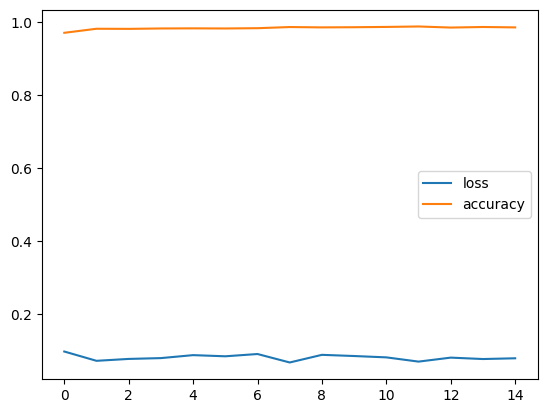

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot()

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Get the true labels
y_test = test_data.classes

# Predict the probabilities from the model
y_pred_probs = model.predict(test_data)

# Convert prediction probabilities to class labels
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Calculate accuracy, precision, recall, f1-score
report = classification_report(y_test, y_pred_classes, target_names=class_names)

print(report)


63/63 [==============================] - 8s 130ms/step
              precision    recall  f1-score   support

        cats       0.49      0.49      0.49      1000
        dogs       0.49      0.49      0.49      1000

    accuracy                           0.49      2000
   macro avg       0.49      0.49      0.49      2000
weighted avg       0.49      0.49      0.49      2000

